## <center>Определение</center>

**Дерево решений** представляет собой последовательность условий вида $x_j\le t$, которые называются **предикатами**, или **решающими правилами**.

Cами предикаты в вершинах мы ранее обозначали как:

$$B_{\nu }(x_j,\ t)\ =\ I[x_j\le t]$$

Каждый предикат разделяет множество объектов $X$ на два подмножества:

* **левое** — множество тех объектов, для которых заданное в предикате условие выполняется: $X^{left}=\{x\ |\ x_j\le t\}$;

* **правое** — множество тех объектов, для которых условие ложно: $X^{right} = X \backslash X^{left} = \{x \mid x_j > t \}$.

Последовательность предикатов лучше всего представлять в виде **ациклического связного графа**. 

Информация, указанная в вершинах графа, определяется во время обучения дерева решений:

* $x_j\le t$ — условие предиката;

* **gini** — значение критерия информативности (в данном случае используется критерий Джини);

* **samples** — число объектов из обучающей выборки, попавших в вершину;

* **value** — число объектов каждого из классов из обучающей выборки, попавших в вершину.

В построенном графе выделяют **три типа вершин**:

1) *корневая вершина (root node)* — то, откуда всё начинается;

2) *внутренние вершины (intermediate nodes)*;

3) *листья (leafs)* — конечные вершины дерева, в которых определяется конечный «ответ» — прогноз дерева решений.

![image.png](https://lms-cdn.skillfactory.ru/assets/courseware/v1/7b0c9b8ff0219ff9f5a63ae3bb1dc95d/asset-v1:Skillfactory+DSMED+2023+type@asset+block/MATHML_md8_2_4.png)

Вершины графа группируются в уровни, которые называются **глубиной дерева (depth)**. Отсчёт уровней ведётся с 0 (то есть корневая вершина не считается при подсчёте глубины дерева).

> В задаче **регрессии** прогноз целевой переменной $\hat{y}$ будет определяться принципом усреднения, то есть объекту $x$ в качестве прогноза присваивается среднее (или медианное) значение целевой переменной по объектам, попавшим в лист на этапе обучения дерева.

> В задаче **классификации** прогноз целевой переменной $\hat{y}$ будет определяться принципом голосования большинства, то есть объекту $x$ присваивается самый популярный класс объектов, попавших в лист на этапе обучения дерева.

## <center>Геометрическая интерпретация</center>

В общем случае, когда факторов $m$ штук, то есть объект $x\in \ X$ является вектором из пространства $\mathbb{R}^m$, мы получаем $m$-мерное пространство, разбитое на области, представляющие собой $m$-мерные параллелепипеды или, как их называют в математике, гиперпараллелепипеды.

**В случае задачи регрессии (Decision Tree Regressor)** ответ модели (значение целевого признака) будет определяться как среднее значение целевой переменной $y$ внутри области $R_p$, соответствующей листовой вершине. Математически это записывается следующим образом:

$$\hat{y}=a(x)=\frac{1}{\left|R_p \right|}\sum_{y \ \in \ R_p}{}y$$

Для примера визуализации из всех признаков, описывающих объекты недвижимости, мы выберем:

* `Lot_Frontage` — ширина фасада;
* `Lot_Area` — площадь объекта недвижимости.

Необходимо предсказать стоимость недвижимости (`Sale_Price`).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

> Для более понятной визуализации перед построением дерева уберём из датасета объекты с `Lot_Frontage` > 150 и с `Lot_Area` > 20000.

In [2]:
# Создаём обучающую выборку
ames_data = pd.read_csv('data/AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
X = ames_data[['Lot Frontage', 'Lot Area']]
y = ames_data['SalePrice']

In [3]:
# Инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X.values, y)

DecisionTreeRegressor(max_depth=3)

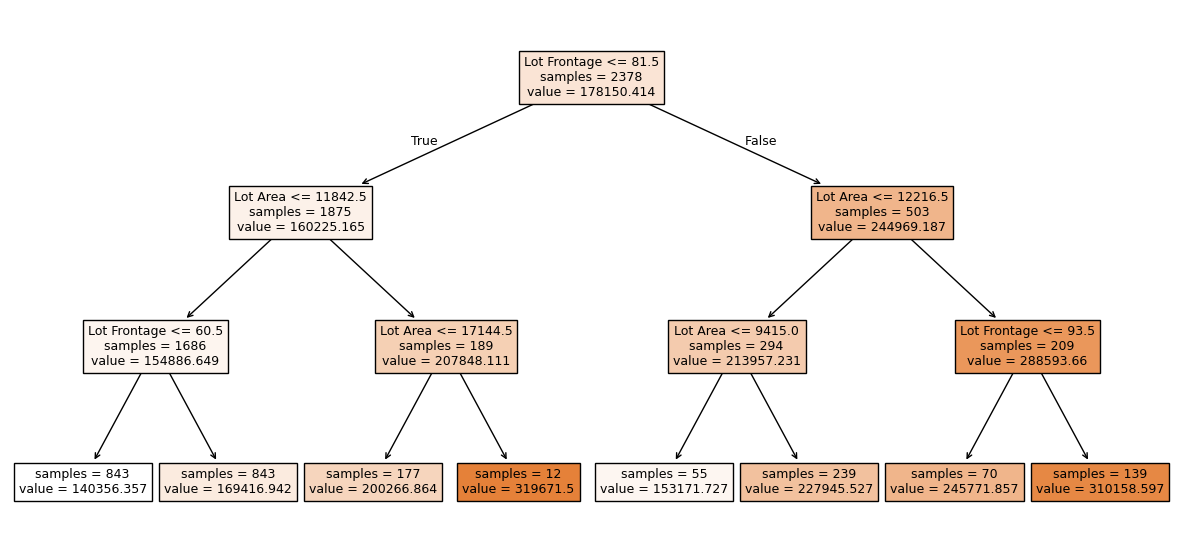

In [4]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

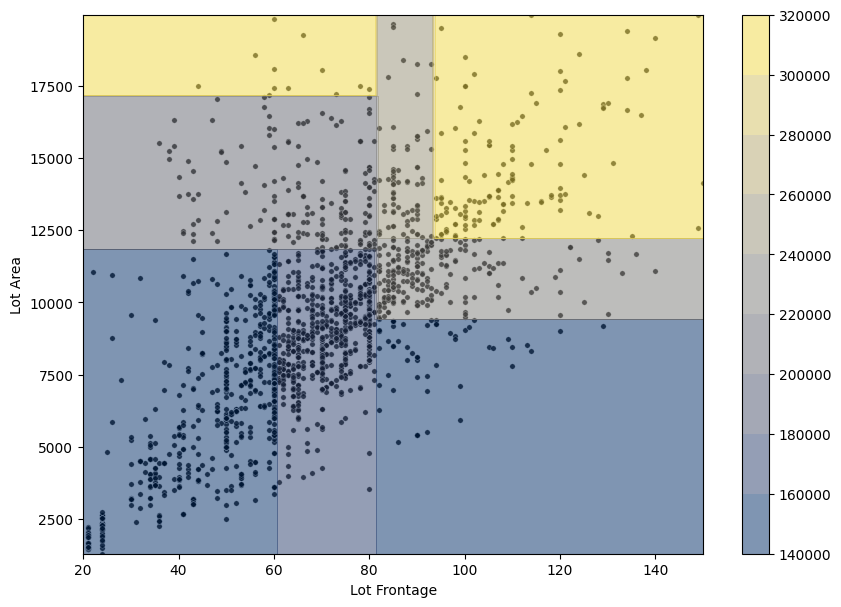

In [5]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)

**В случае задачи классификации (Decision Tree Classifier)** ответ модели (класс объекта) будет определяться голосованием большинства внутри области $R_p$, то есть дерево будет возвращать тот класс, который наиболее популярен в области $R_p$, соответствующей листовой вершине.

Формула оценки вероятности принадлежности объекта к $k$-му классу будет иметь следующий вид:

$$P_k=\frac{1}{\left|R_p \right|}\sum_{y\ \in \ R_p}{}[y=k]$$

Тогда сам класс объекта $\hat{y}$ определяется как класс с максимальной из вероятностей. Математически это будет выглядеть так:

$$\hat{y}=a(x)=argmax_{k\in K}(P_k)$$

В качестве примера для визуализации из всех характеристик, описывающих изображения банкнот, будем использовать:

* `Variance` (дисперсию);
* `Skewness` (асимметрию).

Наша цель — предсказать, является ли банкнота фальшивой (`Class`): 1 — фальшивая, 0 — подлинная.

In [6]:
# Создаём обучающую выборку    
bill_data = pd.read_csv('data/bill_authentication.csv')
X = bill_data[['Variance', 'Skewness']]
y = bill_data['Class']

In [7]:
# Инициализируем модель дерева решений с максимальной глубиной 4 и обучаем её
dt_clf = tree.DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X.values, y)

DecisionTreeClassifier(max_depth=4)

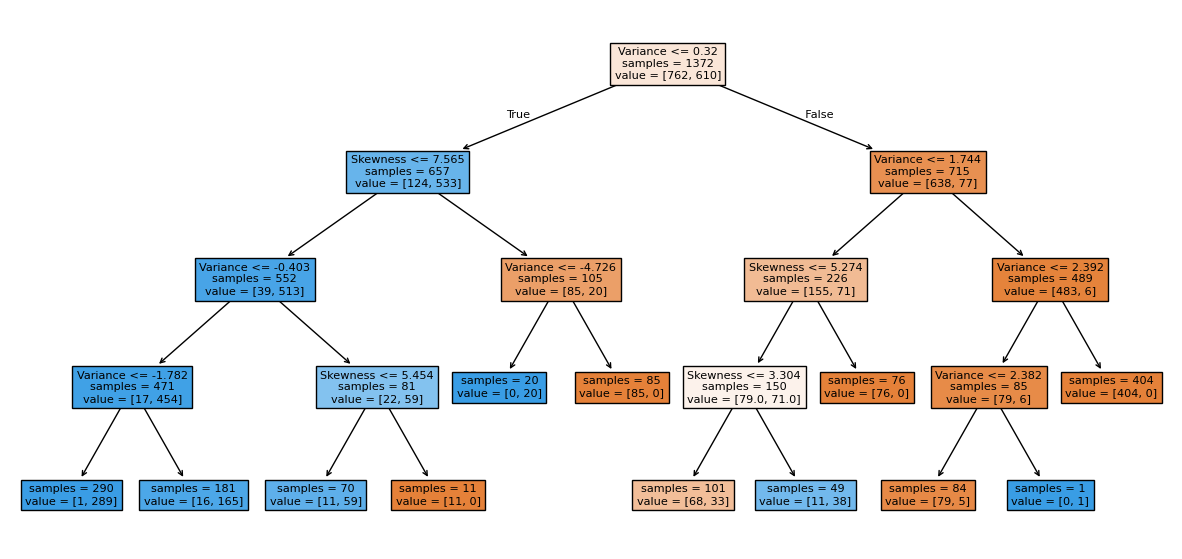

In [8]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_clf, #дерево решений
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

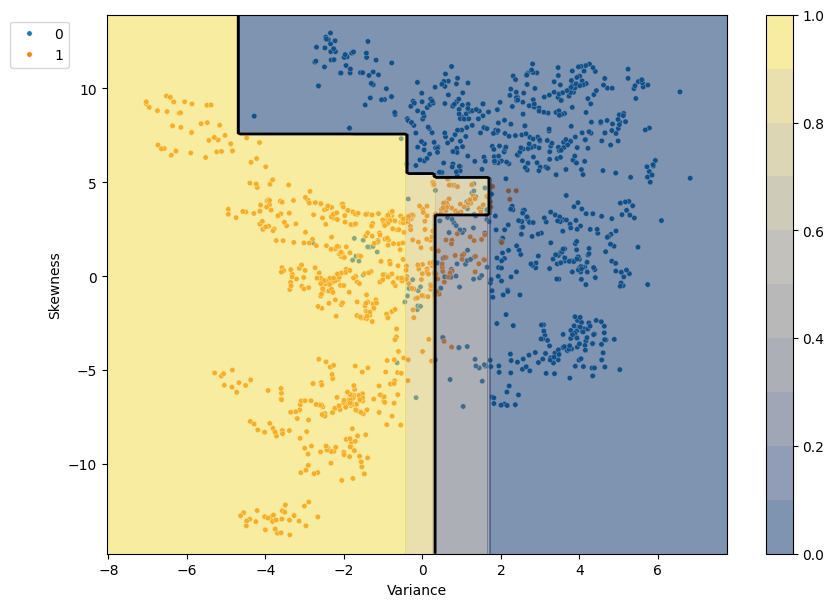

In [9]:
# Построим диаграмму рассеяния 
# И визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области

def plot_decision_bound_classification(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    probs = model.predict_proba(X_net)[:, 1]
    probs = probs.reshape(xx1.shape)
    
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, s=15, alpha=1)
    contour = plt.contourf(xx1, xx2, probs, 10, cmap='cividis', alpha=0.5)
    bound = plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    fig.colorbar(contour)
    plt.legend(bbox_to_anchor=(-0.05, 1))
# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_classification(X, y, dt_clf, fig)

## <center>Свойства алгоритма</center>

**Несколько интересных свойств:**

1) Полученная функция $a(x)$ является кусочно-постоянной, а у таких функций производная равна нулю во всех точках, где задана функция. Следовательно, при поиске оптимального решения можно забыть о градиентных методах, таких как SGD.

2) Дерево решений способно идеально приблизить обучающую выборку, но при этом ничего не выучить: для этого достаточно построить такое дерево, в каждый лист которого будет попадать только один объект.

    Такая модель будет обладать идеальным качеством на обучающей выборке, однако при её использовании на реальных данных качество будет низким. Иначе говоря, модель будет переобученной.

# <center>Алгоритм CART</center>

**CART (Classification and Regression Tree)** — это алгоритм, предназначенный для построения бинарных деревьев решений. Он очень похож на C4.5, однако, в отличие от последнего, предназначен как для задач классификации, так и для задач регрессии. CART важен для нас, поскольку именно он используется для построения моделей решающих деревьев в sklearn.

Под **внутренними параметрами $w$** понимается структура дерева, а именно последовательность предикатов $B_v(x_j,\ t)=[x_j\le t]$ и сами параметры $j$ (номер признака, по которому строится условие в предикате) и $t$ (пороговое значение для условия), то есть $w=(j,\ t)$. 

Для каждого из возможных предикатов $B_v(x_j,\ t)$ нам необходимо подсчитать значение неоднородности $G(X,\ y,w)$ на всей выборке и определить такую комбинацию w_{opt}=(j_{opt},\ t_{opt}), которая даёт минимум:

$$w_{opt}=argmin_wG(X,\ y,w)$$

Псевдокод такого алгоритма будет иметь вид:

In [10]:
# min_loss = inf
# optimal_split_params = None
# for j in range(M):
#     thresholds = find_candidates_for_thresholds(X[:, j], y)
#     for t in thresholds:
#         split_params = (j, t)
#         loss = calculate_loss(X, y, split_params)
#         if loss < min_loss:
#             min_loss = loss
#             optimal_split_params = split_params

> Здесь `inf` означает бесконечность, то есть до начала работы алгоритма перебора значение переменной `min_loss` — какое-то очень большое число. 

Итого, если у нас есть $M$ факторов и $N$ наблюдений, то, чтобы найти оптимальные параметры разбиения, нам в худшем случае понадобится перебрать $M(N-1)$ комбинаций. 

Для того чтобы создать пороговые значения для $x_j$, необходимо:

1) Отсортировать числовой фактор $x_j$ по возрастанию.

2) Вычислить среднее между двумя соседними уникальными значениями фактора. Более простое название такой операции — **скользящее среднее** (они и будут кандидатами на пороги $t$ для фактора $x_j$.).

3) В качестве кандидатов на пороговые значений $t$ выбираются только те значения, при которых целевой признак меняет своё значение.

P.S. смотри блокнот *"extra_1"*

In [11]:
# Задание 3.4

ames_data = pd.read_csv('data/AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)

def find_candidates_for_thresholds(x, y):
    x = x.sort_values().drop_duplicates()
    x_roll_mean = x.rolling(2).mean().dropna()
    y = y[x_roll_mean.index]
    y_roll_mean = y.diff()
    candidates = x_roll_mean[y_roll_mean != 0]
    return candidates.values

print(find_candidates_for_thresholds(
    ames_sample['Lot Frontage'], 
    ames_sample['SalePrice']
))

[ 53.  58.  61.  65.  69.  71.  76.  86.  94. 101.]


In [12]:
# Задание 3.5

print(find_candidates_for_thresholds(
    ames_sample['Lot Area'], 
    ames_sample['SalePrice']
))

[ 5508.   7153.   7425.   7949.   8405.5  8526.5  8850.   9137.5  9466.
 10051.5 10507.  10834.  11365.  12288. ]


In [13]:
# Задание 4.3

ames_data = ames_data[(ames_data["Lot Frontage"] <=150) & (ames_data["Lot Area"] <=20000)]

ames_sample = ames_data[["Lot Frontage", "Lot Area", "SalePrice"]].sample(
    n=15, random_state=42, ignore_index=True
)

X = ames_sample[["Lot Frontage", "Lot Area"]]
y = ames_sample["SalePrice"]

In [14]:
def best_split(X, y, criterion):
    M = X.shape[1]
    min_weighted_impurity = np.inf
    optimal_split_params = None
    for j in range(M):
        thresholds = find_candidates_for_thresholds(X.iloc[:, j], y)
        for t in thresholds:
            split_params = (j, t)
            weighted_impurity = calculate_weighted_impurity(X, y, split_params, criterion)
            if weighted_impurity < min_weighted_impurity:
                min_weighted_impurity = weighted_impurity
                optimal_split_params = split_params
    return optimal_split_params

In [15]:
def squared_error(y):
    y_pred = y.mean()
    return ((y - y_pred) ** 2).mean()

In [16]:
def split(X, y, split_params):
    j, t = split_params
    predicat = X.iloc[:, j] <= t
    X_left, y_left = X[predicat], y[predicat]
    X_right, y_right = X[~predicat], y[~predicat]
    return X_left, y_left, X_right, y_right

In [17]:
def calculate_weighted_impurity(X, y, split_params, criterion):
    X_left, y_left, X_right, y_right = split(X, y, split_params)
    N, N_left, N_right  = y.size, y_left.size, y_right.size
    score = N_left / N * criterion(y_left) + N_right / N * criterion(y_right)
    return score

Optimal j: 0
Optimal t: 71
Weighted impurity: 1414654917


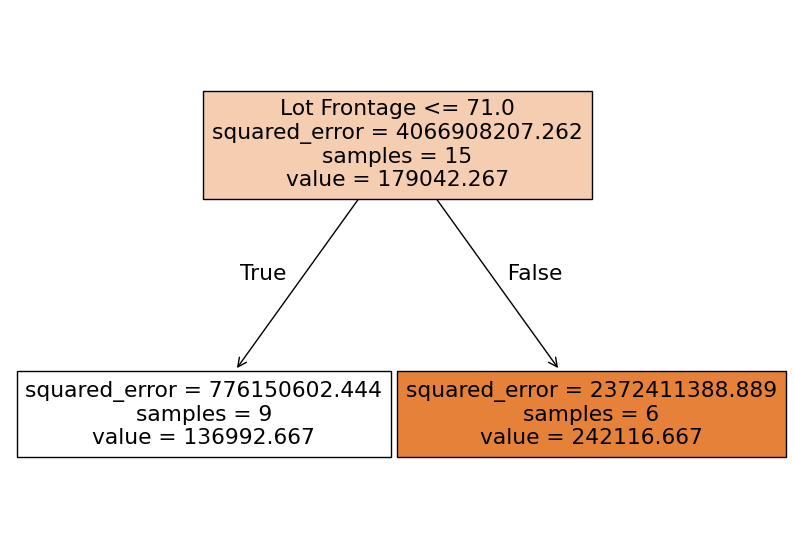

In [18]:
# Находим оптимальные параметры разбиения
optimal_params = best_split(X, y, criterion=squared_error)
print('Optimal j: {}'.format(optimal_params[0]))
print('Optimal t: {:.0f}'.format(optimal_params[1]))
print('Weighted impurity: {:.0f}'.format(calculate_weighted_impurity(X, y, optimal_params, criterion=squared_error)))

# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем её
dt = tree.DecisionTreeRegressor(max_depth=1, criterion='squared_error', random_state=0)
dt.fit(X, y)
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

In [19]:
# Задание 4.5

bill_data = pd.read_csv('data/bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [20]:
def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

Optimal j: 1
Optimal t: 3.221
Impurity: 0.460


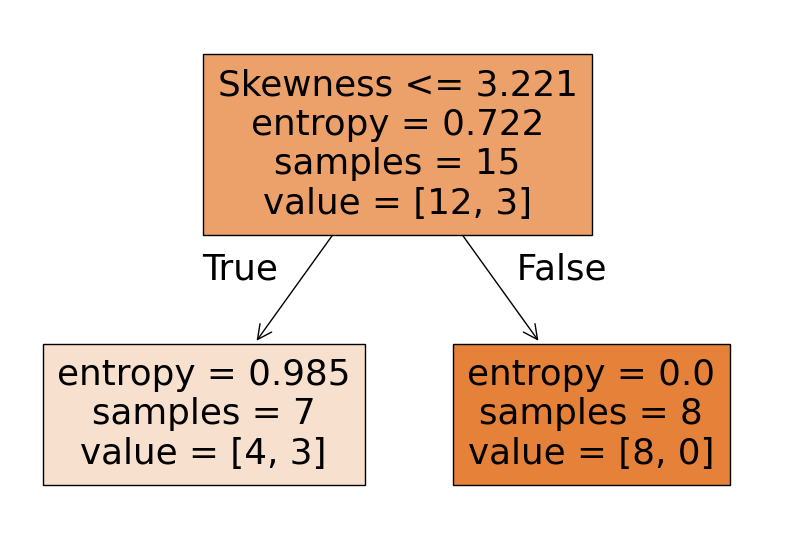

In [21]:
# Находим оптимальные параметры разбиения
optimal_params = best_split(X, y, criterion=entropy)
print('Optimal j: {}'.format(optimal_params[0]))
print('Optimal t: {:.3f}'.format(optimal_params[1]))
print('Impurity: {:.3f}'.format(calculate_weighted_impurity(X, y, optimal_params, criterion=entropy)))

# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем её
dt = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
dt.fit(X, y)
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

In [22]:
# Задание 5.3

bill_data = pd.read_csv('data/bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [23]:
# Вспомогательный класс вершины
class Node:
    def __init__(self, 
                 left=None, #ссылка на левого потомка
                 right=None, #ссылка на правого потомка
                 value=None, #ответ алгоритма
                 split_params=None, #параметры разбиения
                 impurity=None, #неоднородность в вершине
                 samples=None, #количество объектов, попавших в вершину
                 is_leaf=False): #булева переменная, которая указывает, является ли вершина листовой
        self.left = left
        self.right = right
        self.split_params = split_params
        self.value = value
        self.impurity = impurity
        self.samples = samples
        self.is_leaf = is_leaf

# Возвращает модальное значение
def create_leaf_prediction(y):
    value = y.mode()[0]
    return value

# Критерий остановка (базовый: равенство нулю)
def stopping_criterion(X, y, criterion):
    return criterion(y) == 0

# Рекурсивный алгоритм построения дерева
def build_decision_tree(X, y, criterion):
    if stopping_criterion(X, y, criterion):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=entropy)
        X_left, y_left, X_rigth, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion)
        right = build_decision_tree(X_rigth, y_right, criterion)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    return node

# Принимает корневую вершину
# Рекурсивно выводит дерево в виде текста
def print_decision_tree(node, depth=0):
    depth += 1
    if node.is_leaf:
        print('   ' * depth, 'class: {}'.format(node.value))
    else:
        print('   ' * depth, 'feature_{} <= {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.left, depth=depth)
        print('   ' * depth, 'feature_{} > {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.right, depth=depth)

    feature_1 <= 3.221:
       feature_0 <= 2.756:
          feature_0 <= -1.254:
             class: 0
          feature_0 > -1.254:
             feature_0 <= -0.063:
                class: 1
             feature_0 > -0.063:
                feature_0 <= 0.988:
                   class: 0
                feature_0 > 0.988:
                   class: 1
       feature_0 > 2.756:
          class: 0
    feature_1 > 3.221:
       class: 0
5


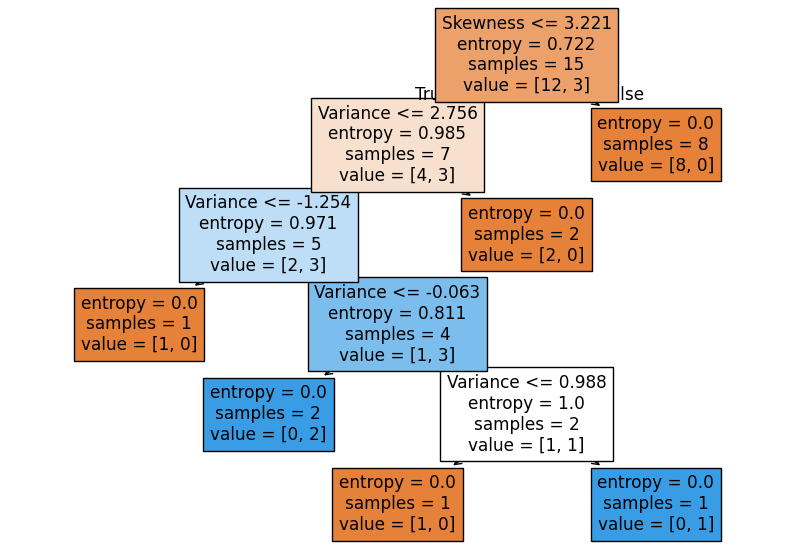

In [24]:
# Строим дерево решений и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy)
print_decision_tree(decision_tree)

# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем её
dt = tree.DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=0)
dt.fit(X, y)

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(
    decision_tree=dt, # Дерево решений 
    feature_names=X.columns, # Названия факторов
    filled=True, # Расцветка
    impurity=True, # Отображать ли неоднородность в вершинах
);
print(dt.get_depth())